<a href="https://colab.research.google.com/github/Fidi000/CSCI-191/blob/main/MNIST_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

Gathering and unzip data from github

In [ ]:
!wget 'https://github.com/Fidi000/CSCI-191/raw/MLData/MNISTtrain.zip'
!unzip '/content/MNISTtrain.zip'

!wget 'https://github.com/Fidi000/CSCI-191/raw/MLData/MNISTtest.zip'
!unzip '/content/MNISTtest.zip'

--2021-12-04 23:13:38--  https://github.com/Fidi000/CSCI-191/raw/MLData/MNISTtrain.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fidi000/CSCI-191/MLData/MNISTtrain.zip [following]
--2021-12-04 23:13:38--  https://raw.githubusercontent.com/Fidi000/CSCI-191/MLData/MNISTtrain.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9606023 (9.2M) [application/zip]
Saving to: ‘MNISTtrain.zip’

MNISTtrain.zip      100%[===================>]   9.16M  --.-KB/s    in 0.06s   

2021-12-04 23:13:39 (158 MB/s) - ‘MNISTtrain.zip’ saved [9606023/9606023]

Archive:  /content/MNISTtrain.zip
  inflating: train

# Training Data

In [ ]:
mnistTrain = pd.read_csv('/content/train.csv')
data = mnistTrain.values
print(data.shape)
print (data[1,1:])

(42000, 785)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  30 137 137
 192  86  72   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  16 179 254 254 254
 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254
 104   0   0   0   0   0   0   0   0   0   0   0   0   0  61 191 254 254
 254 254 254 109  83 199 254 254 254 2

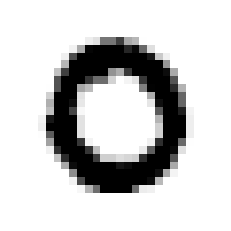

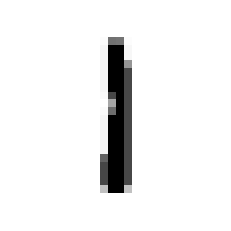

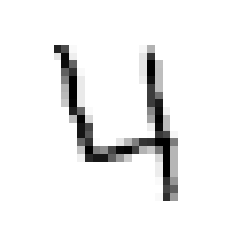

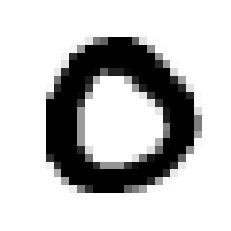

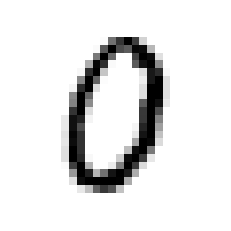

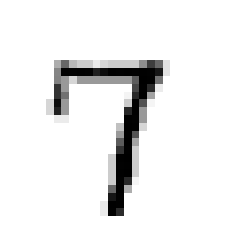

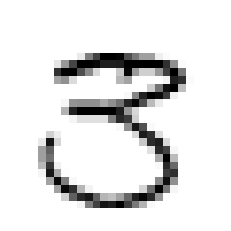

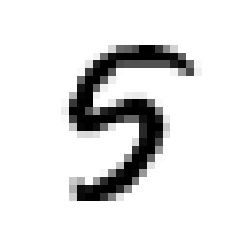

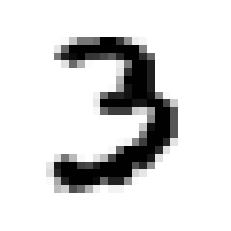

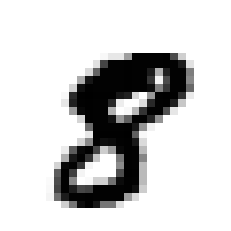

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


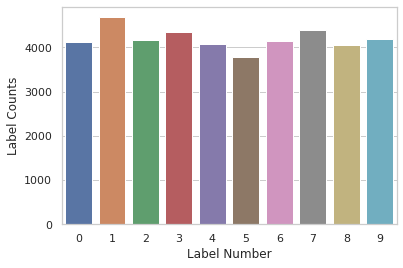

In [ ]:
for row in range(1,11):
    currentNum = mnistTrain.values[row,1:]
    currentNum = currentNum.reshape((28,28))
    plt.imshow(currentNum, cmap = plt.cm.binary,interpolation="nearest")
    plt.axis("off")
    plt.show()

sns.set_theme(style="whitegrid")
sns.barplot(mnistTrain['label'].value_counts().index, mnistTrain['label'].value_counts())
plt.ylabel('Label Counts')
plt.xlabel('Label Number')
plt.show()

In [ ]:
mnist_test = pd.read_csv('/content/test.csv')
mnist_test.info()
mnist_test.index.name='ImageId'

mnist_test['label']=1

mnist_test.index+=1
mnist_test['label'].to_csv('MnistOne.csv', index=True, header=True)
print(mnist_test.values[1,1:])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29  85
  85  85  85  85  85  85  85  71   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 107 128 168 2

Reduction

In [ ]:
rnd_pca4 = PCA(n_components=4)
rnd_pca4.fit(mnist_test.values[:,1:])
X_reduced4 = rnd_pca4.transform(mnist_test.values[:,1:])

for i in range(20, 220, 20):
  rnd_pca = PCA(n_components=i)
  rnd_pca.fit(data[:,1:])
  X_reduced = rnd_pca.transform(data[:,1:])
  print(X_reduced.shape)
  clf = LogisticRegression(solver='saga',
                        max_iter=10000)
  clf.fit(X_reduced, data[:, 0] )
  predict = clf.predict(X_reduced)
  print("Prediction: ", predict)
  print("Accuracy = ", accuracy_score(predict, data[:, 0]))

(42000, 20)
Prediction:  [1 0 1 ... 7 6 9]
Accuracy =  0.8660952380952381
(42000, 40)
Prediction:  [1 0 1 ... 7 6 9]
Accuracy =  0.8965238095238095
(42000, 60)
Prediction:  [1 0 1 ... 7 6 9]
Accuracy =  0.9093333333333333
(42000, 80)
Prediction:  [1 0 1 ... 7 6 9]
Accuracy =  0.9145238095238095
(42000, 100)
Prediction:  [1 0 1 ... 7 6 9]
Accuracy =  0.9168571428571428
(42000, 120)
Prediction:  [1 0 1 ... 7 6 9]
Accuracy =  0.9210952380952381
(42000, 140)
Prediction:  [1 0 1 ... 7 6 9]
Accuracy =  0.923952380952381
(42000, 160)
Prediction:  [1 0 1 ... 7 6 9]
Accuracy =  0.9253095238095238
(42000, 180)
Prediction:  [1 0 1 ... 7 6 9]
Accuracy =  0.9267142857142857
(42000, 200)
Prediction:  [1 0 1 ... 7 6 9]
Accuracy =  0.9284285714285714


28


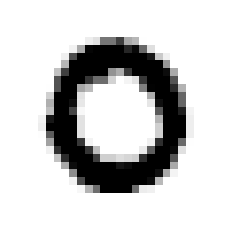

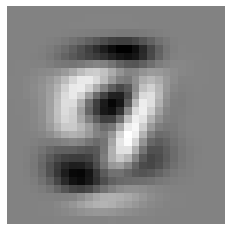

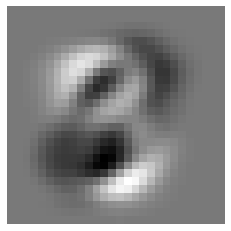

In [ ]:
eigennumbers = rnd_pca4.components_.reshape((4,28,28))
print (len(myNumber))
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
myNumber = eigennumbers[1]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
myNumber = eigennumbers[2]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

MLP

In [ ]:
from sklearn.linear_model import Perceptron
MLP200 = MLPClassifier()
MLP200.fit(X_reduced, mnistTrain.values[:,0])
MLPPred = MLP200.predict(X_reduced)
test_df['label']= Pred_MLP_200
test_df['label'].to_csv('MNISTMLP_components_200.csv', index=True, header=True)

MLPClassifier()
[1 0 1 ... 7 6 9]
